# Recitation 3 - Deep Learning

## Introduction

* One of the machine learning technique that learns features directly from data.

* Why ? When the amounth of data is increased (usually > 1 million), traditional machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy.
![](http://preview.ibb.co/d3CEOH/1.png)

* Where ? Speech recognition, image classification, natural language procession (nlp) or recommendation systems

* Difference between Deep Learning and traditional ML
![](http://preview.ibb.co/hgpNAx/2.png)

*Most details here are summarized from [1]*

## Introduction to Artificial Neural Networks

* The most simple neural network is the “perceptron”, which, in its simplest form, consists of a single neuron.

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras+Python+Tutorial/content_content_neuron.png)

* Components of an artifical neuron
  1. **Input nodes**: As it so happens, each input node is associated with a numerical value, which can be any real number.
  2. **Connections**: Each connection that departs from the input node has a weight associated with it, and this can also be any real number.
  3. **Weighted sum**: All the values of the input nodes and weights of the connections are brought together sum: y=f(w1∗x1+w2∗x2+...wD∗xD)
  4. **Transfer or Activation function**: The above weighted sum acts as input to a transfer or activation function. Just like a biological neuron only fires when a certain threshold is exceeded, the artificial neuron will also only fire when the sum of the inputs exceeds a threshold!
 5. **Output**: The final output node associated with the above function.


*Most Text and images in this section are taken from [2]*

## Types of deep learning techniques

At a high-level, neural networks are either encoders, decoders, or a combination of both. Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations. As the lecture describes, deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

![Deep learning concepts](https://i.imgur.com/EAl47rp.png)


1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features.
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc.
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc.
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc.


#### Different Deep Learning Architectures Visualized
![Different Deep Learning Architectures Visualized](https://www.guru99.com/images/tensorflow/083018_0542_WhatisDeepl3.png)

*Most details here are summarized from [3]*


## Programming exercise - Wine Prediction

* We are given several physicochemical and sensory variables features associated with each wine (features!). **Use Deep Learning to determine whether a given wine is white or red!**

* We will be using *Feed forward Neural Networks*, as they are typically used for classification tasks. Our NN will be 3 layers of perceptrons as we shall eventually see.

*Most examples and code below is taken from [2]*

### Loading the data

We are using the [wine quality data set](https://archive.ics.uci.edu/ml/datasets/wine+quality) from UCI's machine learning archive.

In [0]:
# Import pandas 
import pandas as pd
import numpy as np

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

### Basic Preprocessing

Simply denoting red by 1 and white by 0, combining them to form a dataset


In [0]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

### Data Exploration

Investigate the features.

#### Print the individual datasets to see what features exist



In [40]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1

#### Bust some myths ? Does red wine actually have more sulphates for the same alcohol content as compared to white wines, causing more headaches ? Let's see


Quality(x) vs Sulphates(y) for Red and White wines


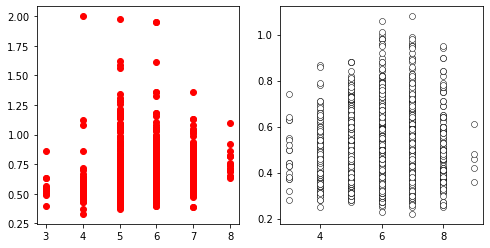

In [41]:
import matplotlib.pyplot as plt

# Construct scatter plots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

print ('Quality(x) vs Sulphates(y) for Red and White wines')
plt.show()

#### Plot a correlation matrix / heatmap and see what variables correlate with which ones. Very insightful!

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


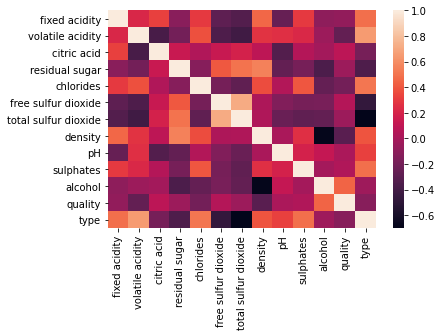

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Split into training and test data



In [0]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data (feature matrix)
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
# random_state controls the shuffling, allows for reproducible output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Standardize the data

Standardization of a dataset is a common requirement machine learning. Models may behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Normal distribution with 0 mean and unit variance).

In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)


### Build the Neural Net

* For our usecase, we need to do binary classification
* A type of network that performs well on such a problem is a multi-layer perceptron. Essentially, we're building a simple stack of fully-connected layers to solve this problem.

* We build a network with 3 layers, the first one being the input, an intermediate layer and finally an output layer
  * The first argument for `Dense()` tells you how many neurons to incorporate into that layer. It takes in (\*, 11) as that's the size of the feature matrix, and outputs a matrix of size (\*, 12).
  * The hidden intermediate layer accepts this and outputs a matrix of size (\*, 8)
  * Finally, the output layer is of size one. It is of type 'sigmoid' which represents the probablity of the result being 1 (red).
  * `relu` means Rectified Linear Unit. It introduces non linearity and helps in approximation. 

* Model compilation
  * *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer. We use `binary_crossentropy` for the binary classification problem of determining whether a wine is red or white. If it were a regression problem, we would use `mse`
  * *Optimizer* - how the model is updated based on the data it sees and its loss function.
  * *Metrics* - used to monitor the training and testing steps.


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential()

# Add an input layer 
model.add(Dense(12, activation=tf.nn.relu, input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation=tf.nn.relu))

# Add an output layer 
model.add(Dense(1, activation=tf.nn.sigmoid))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

### Train the Neural Net

* We train the model for 10 epochs over all the samples in X_train and y_train, in batches of 1 sample. One iteration in an epoch is one forward + backward propogation for one batch. 
* Batch refers to the number of training samples passed through the model during one epoch iteration.
* An epoch in layman's term is the time it takes to forward propogate and backward propogate for all the sample data in a model. If you have a batch of 16 and 16000 examples, then you’ll do forward and backward in one epoch 1000 times 

In [47]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.9975
Epoch 2/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 0.9975
Epoch 3/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9975
Epoch 4/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9975
Epoch 5/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 0.9975
Epoch 6/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 0.9977
Epoch 7/10
136/136 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9977
Epoch 8/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9977
Epoch 9/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9982
Epoch 10/10
136/136 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9977

### Predict and Validate

In [48]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print (test_acc)

68/68 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9949
0.9948717951774597


# Done!

You can now have a 5 minute conversation with data scientists and hold your own :)

###References
1. https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
2. https://www.datacamp.com/community/tutorials/deep-learning-python
3. https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb
